# PROJECT DATA MINING: Stock Market Analysis and Prediction

## Stock Market Data From yahoo Finance

## 21BCE269


In [1]:
# For Data Processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [3]:
pip install pandas_datareader

     ------------------------------------- 109.5/109.5 kB 74.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

### Basic Analysis of Stock Information




In [9]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\Bhavya shah\Downloads\NIFTY.csv")

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set Date column as the index
df.set_index('Date', inplace=True)

# Display the first few rows of the DataFrame
print(df.head())


                  It   Housing      Bank  Commodities    Energy
Date                                                           
2024-04-25  33554.40  10934.83  48494.95     54291.65  39989.25
2024-04-24  33442.55  10884.52  48189.00     53932.50  39561.85
2024-04-23  33714.55  10794.03  47970.45     53905.30  39446.60
2024-04-22  33538.75  10724.37  47924.90     53499.45  39570.05
2024-04-19  33368.30  10647.08  47574.15     53055.45  39357.85


In [14]:

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)


                   It   Housing      Bank  Commodities    Energy
It           1.000000  0.955513  0.944790     0.923685  0.937750
Housing      0.955513  1.000000  0.966635     0.907128  0.981857
Bank         0.944790  0.966635  1.000000     0.907297  0.935961
Commodities  0.923685  0.907128  0.907297     1.000000  0.919520
Energy       0.937750  0.981857  0.935961     0.919520  1.000000


In [13]:
correlation_with_it = correlation_matrix['It'].sort_values(ascending=False)
print(correlation_with_it)

It             1.000000
Housing        0.955513
Bank           0.944790
Energy         0.937750
Commodities    0.923685
Name: It, dtype: float64


In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select relevant columns for analysis (e.g., Housing, Bank, Commodities, Energy)
selected_columns = ['Housing', 'Bank', 'Energy' ,'Commodities']

df_selected = df[selected_columns]

# Drop rows with missing values (if applicable)
df_selected.dropna(inplace=True)

# Standardize the data (important for PCA)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Convert standardized data back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=selected_columns)


C:\Users\Bhavya shah\AppData\Local\Temp\ipykernel_16412\3852375021.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(inplace=True)


In [23]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=1)  # Specify the number of principal components (e.g., 2 for visualization)
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame containing the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC'])

In [24]:
df_pca

,PC
0,6.076490
1,6.011017
2,5.971927
3,5.950390
4,5.889575
...,...
4724,-2.207306
4725,-2.202941
4726,-2.207251
4727,-2.201864


In [26]:
import pandas as pd

# Load CSV files into separate DataFrame objects
tcs_df = pd.read_csv(r"C:\Users\Bhavya shah\Downloads\TCS.NS.csv")  # Replace 'path_to_tcs_data.csv' with the actual path to TCS data CSV file
hcltech_df = pd.read_csv(r"C:\Users\Bhavya shah\Downloads\HCLTECH.NS.csv")  # Replace 'path_to_hcltech_data.csv' with the actual path to HCLTECH data CSV file
wipro_df = pd.read_csv(r"C:\Users\Bhavya shah\Downloads\WIPRO.NS.csv")  # Replace 'path_to_wipro_data.csv' with the actual path to WIPRO data CSV file
techm_df = pd.read_csv(r"C:\Users\Bhavya shah\Downloads\TECHM.NS.csv")  # Replace 'path_to_techm_data.csv' with the actual path to TECHM data CSV file

# Optionally, set Date column to datetime format (if needed)
tcs_df['Date'] = pd.to_datetime(tcs_df['Date'])
hcltech_df['Date'] = pd.to_datetime(hcltech_df['Date'])
wipro_df['Date'] = pd.to_datetime(wipro_df['Date'])
techm_df['Date'] = pd.to_datetime(techm_df['Date'])

# Optionally, set Date column as the index (if needed)
tcs_df.set_index('Date', inplace=True)
hcltech_df.set_index('Date', inplace=True)
wipro_df.set_index('Date', inplace=True)
techm_df.set_index('Date', inplace=True)

# Display sample data for each DataFrame
print("Sample data for TCS:")
print(tcs_df.head())

print("\nSample data for HCLTECH:")
print(hcltech_df.head())

print("\nSample data for WIPRO:")
print(wipro_df.head())

print("\nSample data for TECHM:")
print(techm_df.head())


Sample data for TCS:
               Open        High         Low       Close   Adj Close     Volume
Date                                                                          
2005-04-01  179.125  182.125000  176.750000  181.369995  129.156830  5562672.0
2005-04-04  181.500  182.100006  177.912506  178.470001  127.091652  5257360.0
2005-04-05  178.625  180.312500  177.012497  178.182495  126.886925  3367832.0
2005-04-06  178.375  181.000000  178.375000  180.169998  128.302231  1953408.0
2005-04-07  180.125  181.250000  177.750000  178.149994  126.863838  2483216.0

Sample data for HCLTECH:
                 Open       High      Low      Close  Adj Close     Volume
Date                                                                      
2005-04-01  46.375000  48.307499  45.8950  47.945000  30.386135  6029520.0
2005-04-04  48.000000  48.000000  46.2500  47.200001  29.913988  6634040.0
2005-04-05  46.907501  48.125000  46.7500  47.845001  30.322763  6411736.0
2005-04-06  47.750000  48

In [28]:
tcs_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-04-01,179.125,182.125000,176.750000,181.369995,129.156830,5562672.0
2005-04-04,181.500,182.100006,177.912506,178.470001,127.091652,5257360.0
2005-04-05,178.625,180.312500,177.012497,178.182495,126.886925,3367832.0
2005-04-06,178.375,181.000000,178.375000,180.169998,128.302231,1953408.0
2005-04-07,180.125,181.250000,177.750000,178.149994,126.863838,2483216.0


In [29]:
tcs_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4.705000e+03
mean,1362.856884,1376.860917,1347.979049,1362.325037,1233.232556,3.354706e+06
std,1141.990625,1151.643188,1131.854381,1141.718500,1127.727169,2.870332e+06
min,112.000000,116.112503,103.837502,111.550003,83.763481,0.000000e+00
25%,365.000000,369.899994,358.149994,365.000000,278.597839,1.843611e+06
50%,1151.500000,1165.000000,1140.000000,1154.400024,984.405884,2.642976e+06
75%,2070.000000,2086.850098,2045.000000,2065.399902,1872.624878,4.019828e+06
max,4215.250000,4254.750000,4177.000000,4219.250000,4219.250000,8.806715e+07


In [30]:
# General Info
tcs_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4712 entries, 2005-04-01 to 2024-04-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4705 non-null   float64
 1   High       4705 non-null   float64
 2   Low        4705 non-null   float64
 3   Close      4705 non-null   float64
 4   Adj Close  4705 non-null   float64
 5   Volume     4705 non-null   float64
dtypes: float64(6)
memory usage: 257.7 KB


Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the AAPL(Apple) stocks.

<Axes: xlabel='Date'>

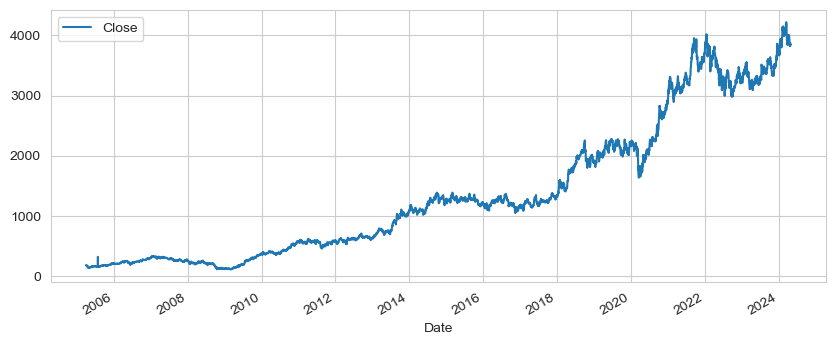

In [31]:
# Let's see a historical view of the closing price
tcs_df['Close'].plot(legend=True, figsize=(10,4))

<Axes: xlabel='Date'>

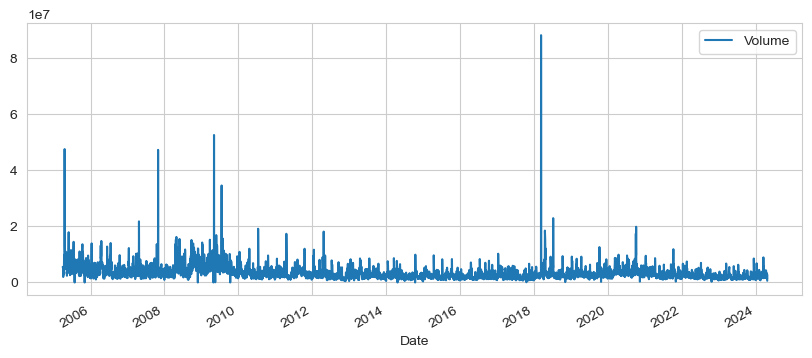

In [32]:
# Now let's plot the total volume of stock being traded each day over the past year

tcs_df['Volume'].plot(legend=True, figsize=(10,4))

In [34]:
# Pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
MA_day = [10,20,50,100]

for ma in MA_day:
    column_name = 'MA for %s days' %(str(ma))
    tcs_df[column_name] =tcs_df['Close'].rolling(window=ma).mean()

Now, lets plot all the additional Moving Averages for AAPL stock

<Axes: xlabel='Date'>

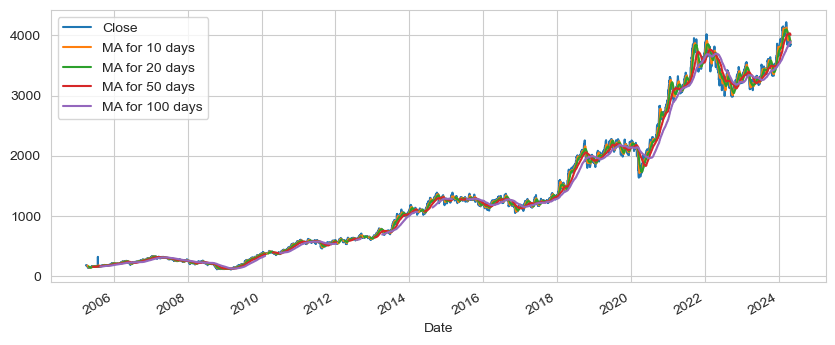

In [36]:
tcs_df[['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(10,4))

### Daily Return Analysis


<Axes: xlabel='Date'>

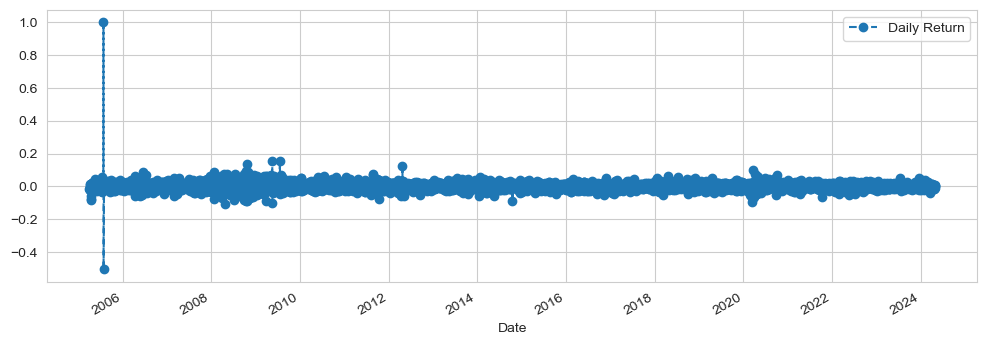

In [37]:
# We'll use pct_change to find the percent change for each day
tcs_df['Daily Return'] = tcs_df['Close'].pct_change()

# Lets plot the daily return percentage
tcs_df['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

Great, now let's get an overall look at the average daily return using a histogram. By using seaborn to create both a histogram and kde plot on the same figure.

<Axes: >

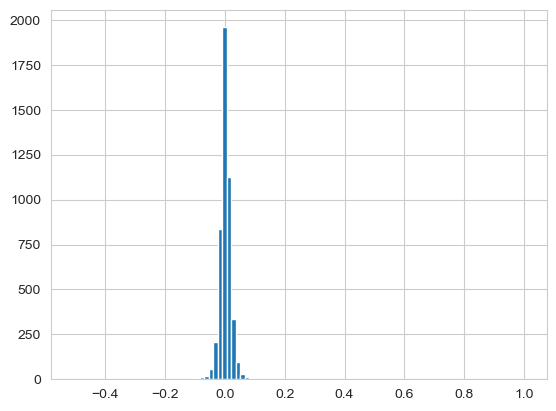

In [40]:
# only with histogram
tcs_df['Daily Return'].hist(bins=100)

C:\Users\Bhavya shah\AppData\Local\Temp\ipykernel_16412\688397314.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tcs_df['Daily Return'].dropna(), bins=100, color='magenta')


<Axes: xlabel='Daily Return', ylabel='Density'>

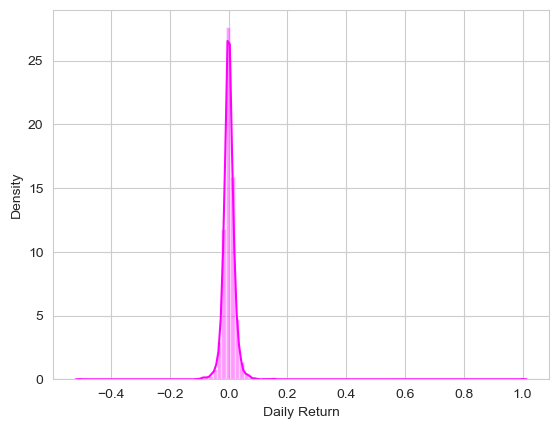

In [41]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(tcs_df['Daily Return'].dropna(), bins=100, color='magenta')

Now what if we wanted to analyze the returns of all the stocks in our list? For that, we need to build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [44]:
import pandas as pd

# Assuming you have four DataFrames: tcs_df, hcltech_df, wipro_df, techm_df containing closing prices
# Extract the 'Close' column from each DataFrame
tcs_close = tcs_df['Close']
hcltech_close = hcltech_df['Close']
wipro_close = wipro_df['Close']
techm_close = techm_df['Close']

# Create a new DataFrame by concatenating the 'Close' columns
closingprice_df = pd.concat([tcs_close, hcltech_close, wipro_close, techm_close], axis=1)
closingprice_df.columns = ['TCS', 'HCLTECH', 'WIPRO', 'TECHM']  # Rename columns based on company names
closingprice_df.dropna(inplace=True)
# Display sample data from the combined DataFrame
print(closingprice_df.head())

                   TCS    HCLTECH       WIPRO       TECHM
Date                                                     
2007-04-02  297.299988  68.125000  116.718758  335.250000
2007-04-03  300.662506  69.574997  120.206253  335.712494
2007-04-04  299.600006  72.025002  123.603760  342.975006
2007-04-05  298.549988  72.199997  124.335007  344.000000
2007-04-09  304.299988  73.462502  126.180008  353.725006


In [45]:
closingprice_df.head(10)

,TCS,HCLTECH,WIPRO,TECHM
Date,,,,
2007-04-02,297.299988,68.125000,116.718758,335.250000
2007-04-03,300.662506,69.574997,120.206253,335.712494
2007-04-04,299.600006,72.025002,123.603760,342.975006
2007-04-05,298.549988,72.199997,124.335007,344.000000
2007-04-09,304.299988,73.462502,126.180008,353.725006
2007-04-10,299.337494,72.425003,123.232506,349.750000
2007-04-11,297.637512,71.762497,123.131256,349.174988
2007-04-12,300.237488,71.900002,121.601257,351.987488
2007-04-13,315.500000,77.050003,127.721252,373.625000


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the APPL stock.

In [46]:
# make a new tech returns DataFrame
tech_returns = closingprice_df.pct_change()

In [47]:
tech_returns.head()

,TCS,HCLTECH,WIPRO,TECHM
Date,,,,
2007-04-02,NaN,NaN,NaN,NaN
2007-04-03,0.011310,0.021284,0.029879,0.001380
2007-04-04,-0.003534,0.035214,0.028264,0.021633
2007-04-05,-0.003505,0.002430,0.005916,0.002989
2007-04-09,0.019260,0.017486,0.014839,0.028270


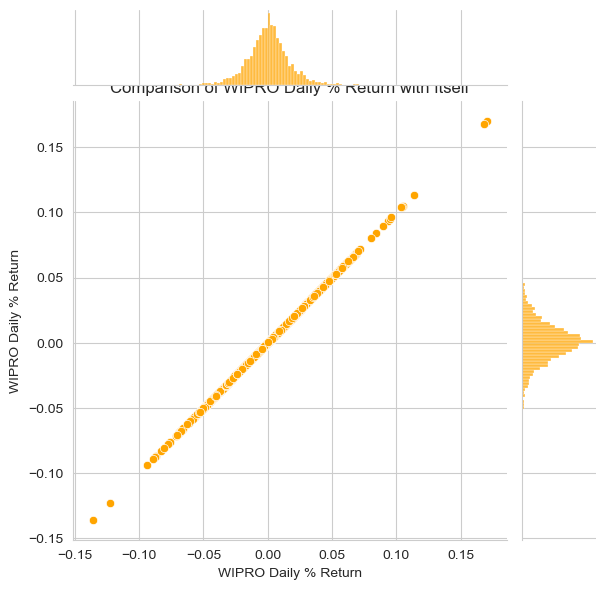

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'tech_returns' is your DataFrame containing daily percentage returns for stocks
# Replace 'WIPRO' with the actual column name in 'tech_returns' for WIPRO's percentage returns

# Create a joint plot to compare WIPRO's percentage returns with itself
sns.jointplot(x='WIPRO', y='WIPRO', data=tech_returns, kind='scatter', color='orange')

# Set plot labels and title
plt.xlabel('WIPRO Daily % Return')
plt.ylabel('WIPRO Daily % Return')
plt.title('Comparison of WIPRO Daily % Return with Itself')

# Show the plot
plt.show()

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

So let's go ahead and compare Google and Amazon the same way.

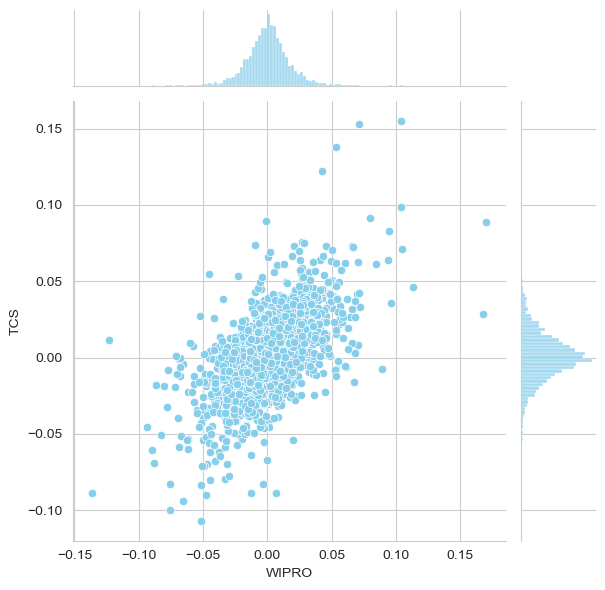

In [50]:
sns.jointplot(x='WIPRO', y='TCS', data=tech_returns, kind='scatter', color='skyblue')

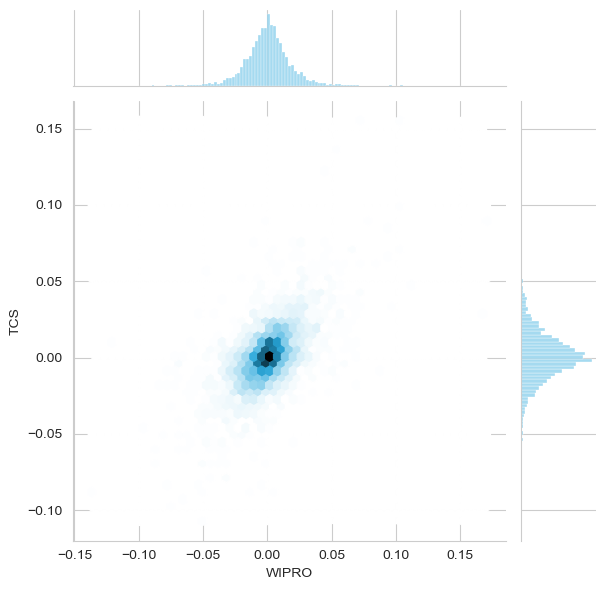

In [51]:
sns.jointplot(x='WIPRO', y='TCS', data=tech_returns, kind='hex', color='skyblue')

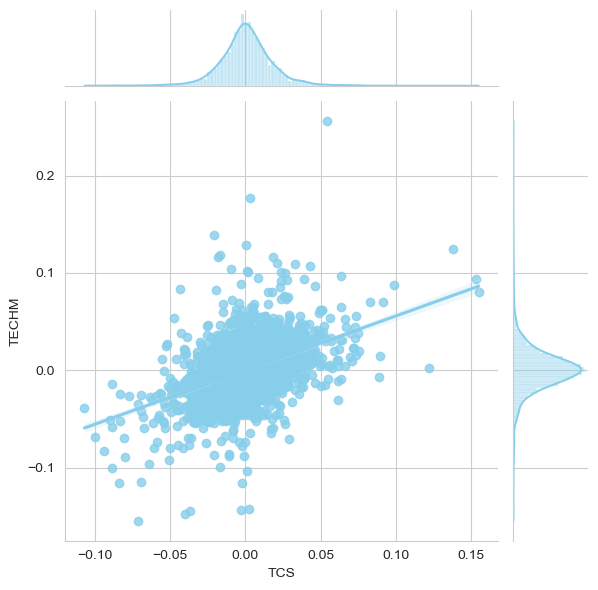

In [55]:
# Lets check out for Apple and Microsoft with reg jointplot
sns.jointplot(x='TCS',y='TECHM',data=tech_returns, kind='reg', color='skyblue')

C:\Users\Bhavya shah\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


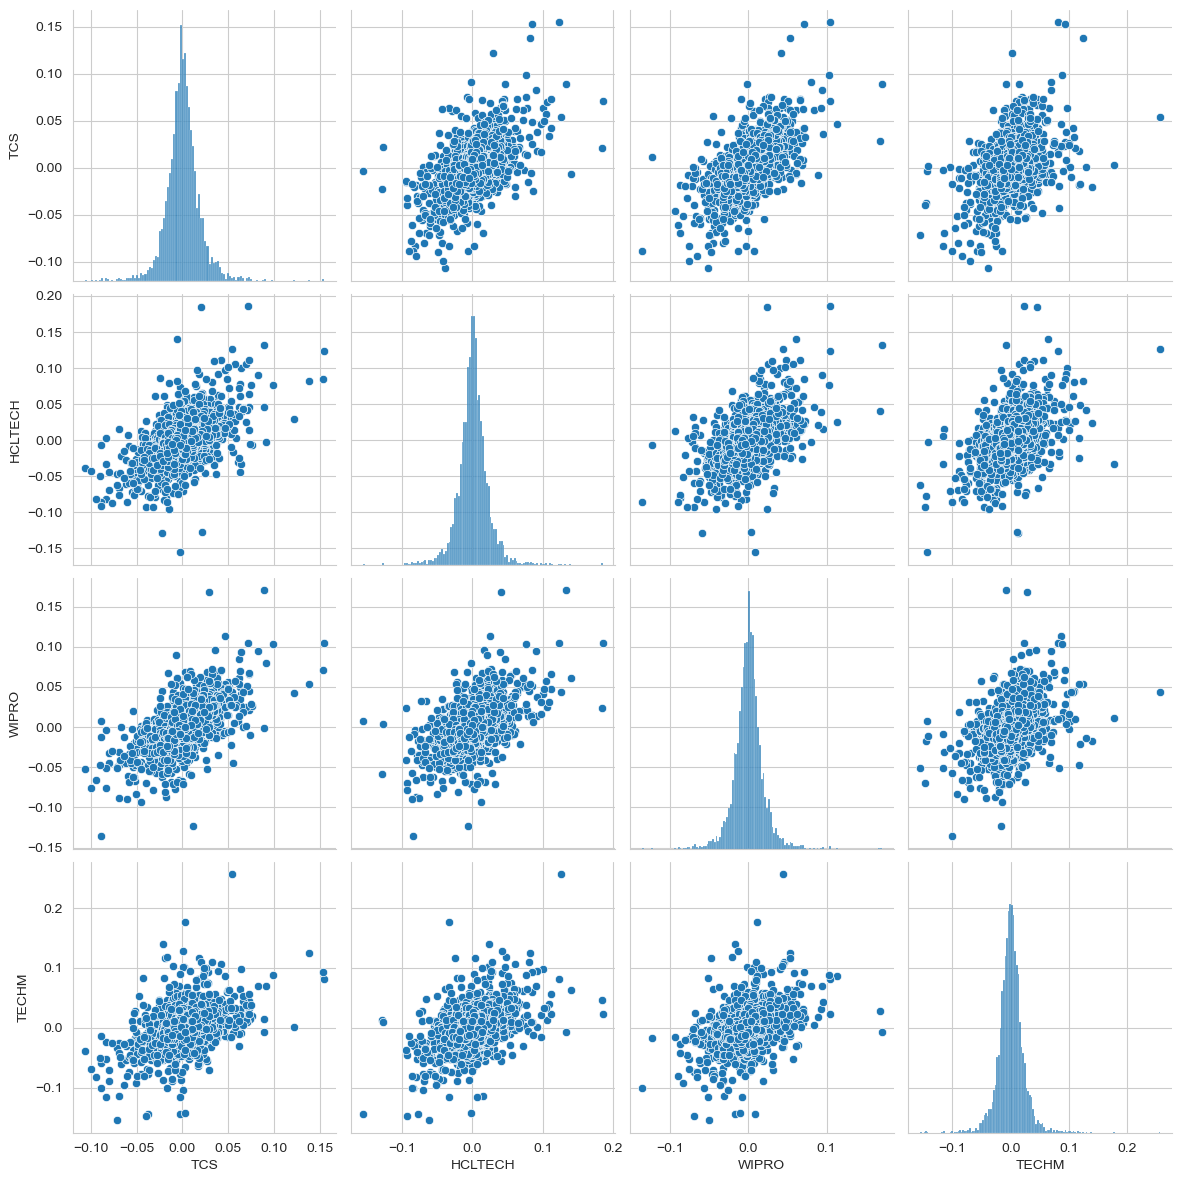

In [57]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_returns.dropna(),size=3)

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. 

Below is an example of utilizing the full power of seaborn to achieve this result.

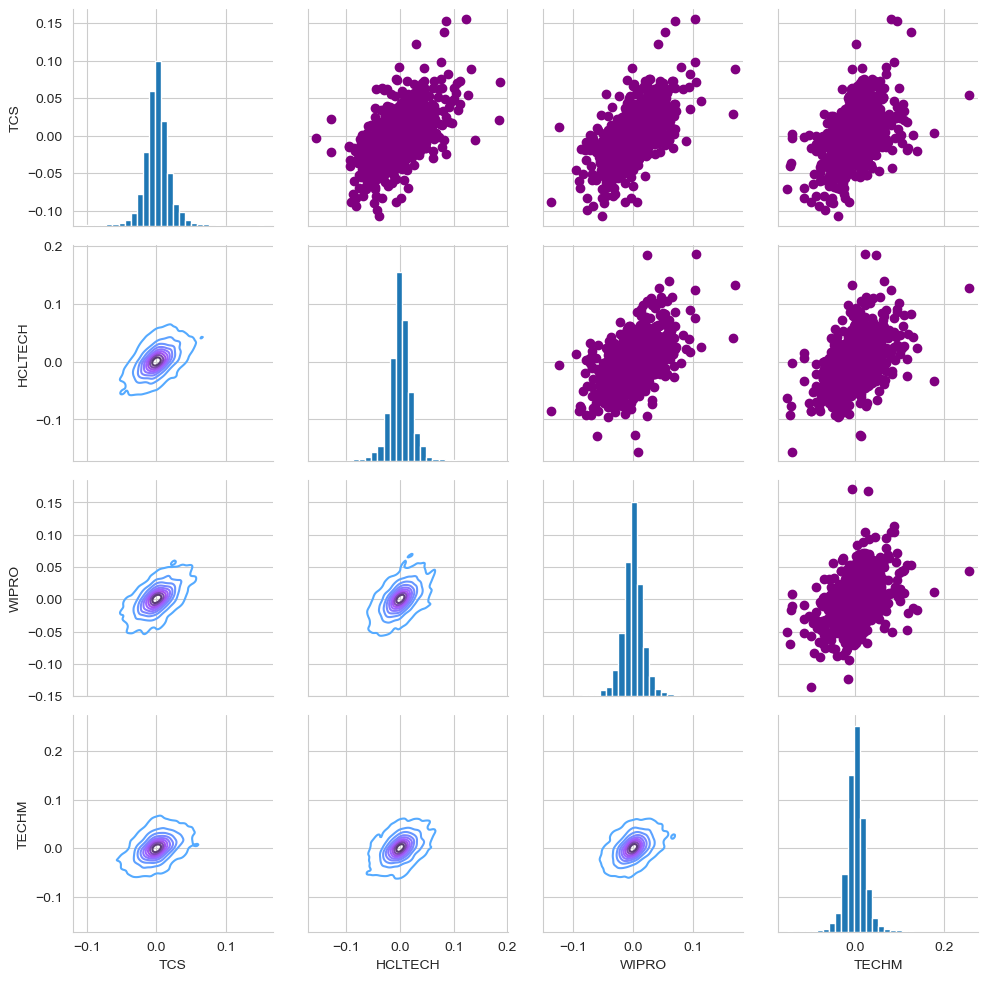

In [58]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(tech_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

We can also analyze the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

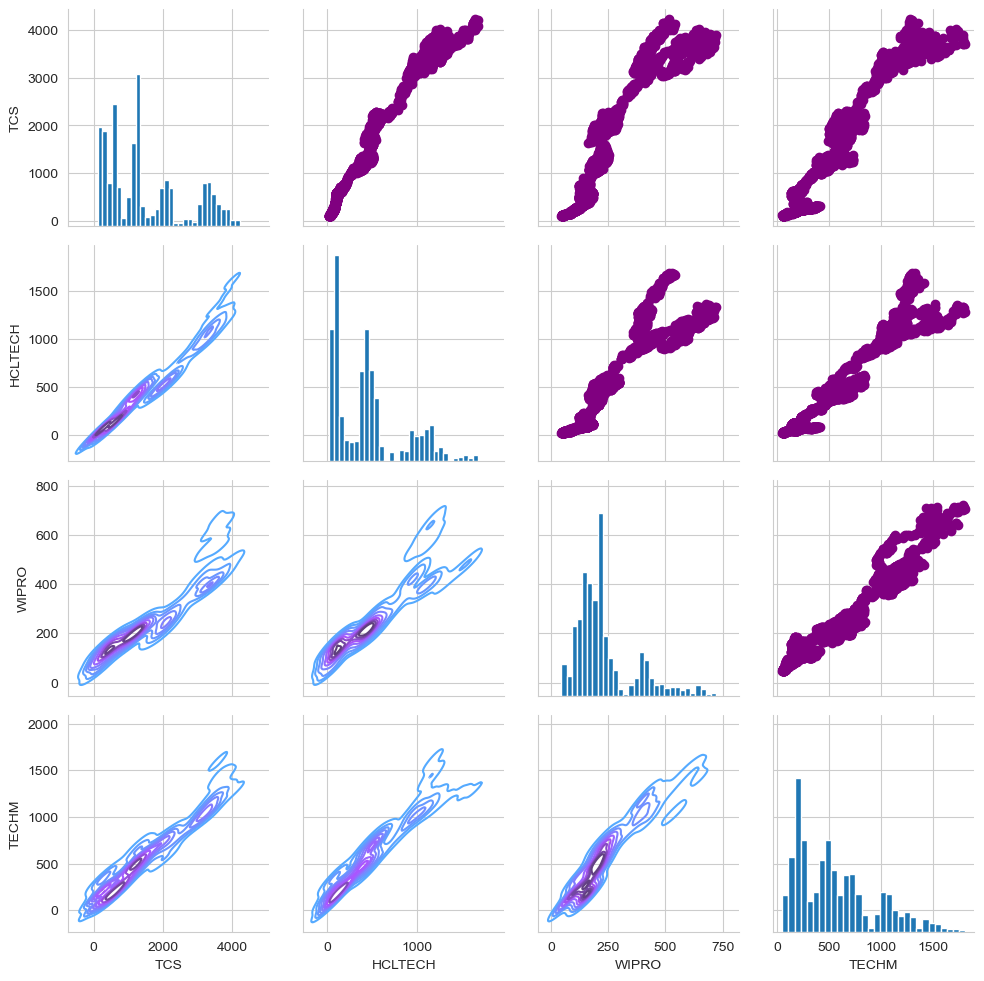

In [59]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(closingprice_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we can also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Google and Amazon stocks.

<Axes: >

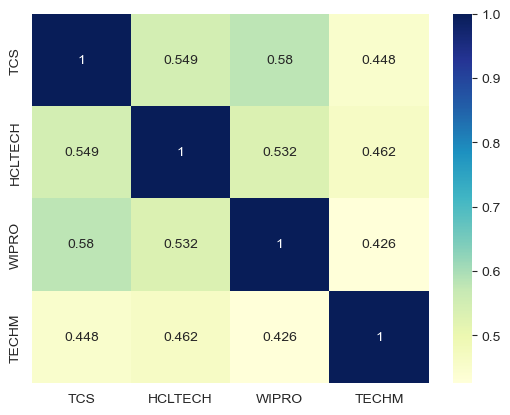

In [60]:
# Let's go ahead and use seaborn for a quick heatmap to get correlation for the daily return of the stocks.
sns.heatmap(tech_returns.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

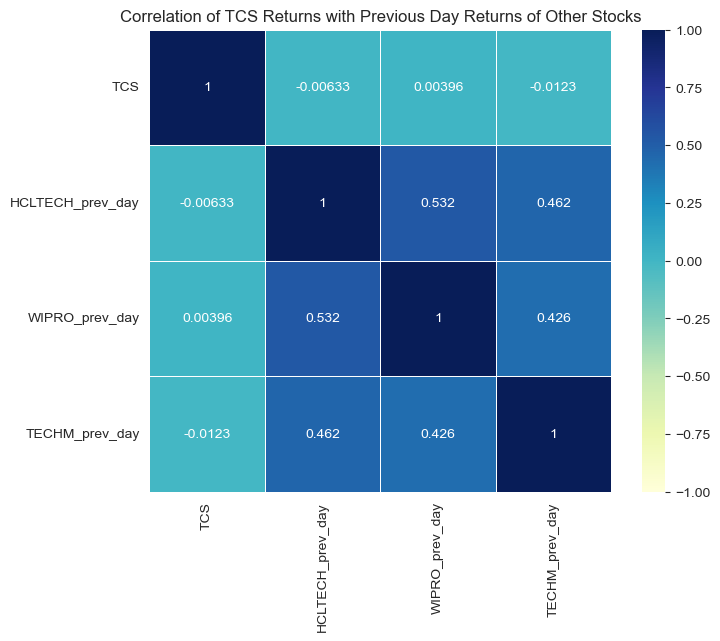

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'tech_returns' is your DataFrame containing daily percentage returns for stocks
# Replace 'TCS', 'HCLTECH', 'WIPRO', 'TECHM' with the actual column names in 'tech_returns'

# Shift the returns of HCLTECH, WIPRO, and TECHM by one day to get previous day returns
tech_returns['HCLTECH_prev_day'] = tech_returns['HCLTECH'].shift(1)
tech_returns['WIPRO_prev_day'] = tech_returns['WIPRO'].shift(1)
tech_returns['TECHM_prev_day'] = tech_returns['TECHM'].shift(1)

# Calculate the correlation matrix between TCS returns and previous day returns of other stocks
correlation_with_tcs = tech_returns[['TCS', 'HCLTECH_prev_day', 'WIPRO_prev_day', 'TECHM_prev_day']].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_tcs, annot=True, fmt=".3g", cmap='YlGnBu', 
            vmin=-1, vmax=1, center=0, square=True, linewidths=.5)
plt.title('Correlation of TCS Returns with Previous Day Returns of Other Stocks')
plt.show()


<Axes: >

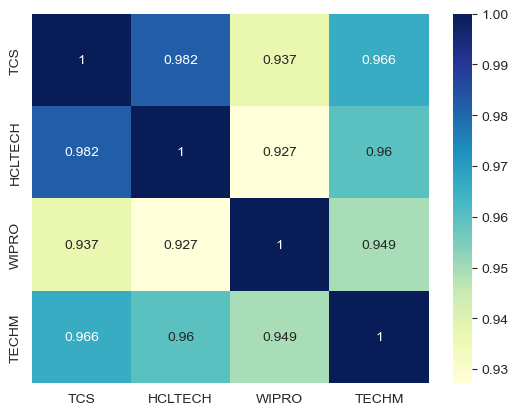

In [63]:
# Lets check out the correlation between closing prices of stocks
sns.heatmap(closingprice_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

##### Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Amazon and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

Great! Now that we've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.

### Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns(Risk).

In [66]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_returns DataFrame
tech_returns.drop(['HCLTECH_prev_day', 'WIPRO_prev_day', 'TECHM_prev_day'], axis=1, inplace=True)

# Verify the DataFrame after dropping columns
print(tech_returns.head())
rets = tech_returns.dropna()

                 TCS   HCLTECH     WIPRO     TECHM
Date                                              
2007-04-02       NaN       NaN       NaN       NaN
2007-04-03  0.011310  0.021284  0.029879  0.001380
2007-04-04 -0.003534  0.035214  0.028264  0.021633
2007-04-05 -0.003505  0.002430  0.005916  0.002989
2007-04-09  0.019260  0.017486  0.014839  0.028270


In [67]:
rets.head()

,TCS,HCLTECH,WIPRO,TECHM
Date,,,,
2007-04-03,0.011310,0.021284,0.029879,0.001380
2007-04-04,-0.003534,0.035214,0.028264,0.021633
2007-04-05,-0.003505,0.002430,0.005916,0.002989
2007-04-09,0.019260,0.017486,0.014839,0.028270
2007-04-10,-0.016308,-0.014123,-0.023360,-0.011238


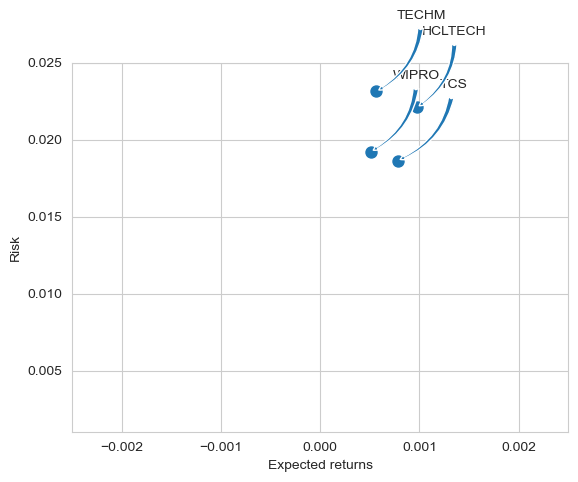

In [68]:
# Defining the area for the circles of scatter plot to avoid tiny little points
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.xlim([-0.0025,0.0025])
plt.ylim([0.001,0.025])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3'))

By looking at the scatter plot we can say these stocks have lower risk and positive expected returns.

### Value at Risk

C:\Users\Bhavya shah\AppData\Local\Temp\ipykernel_16412\2069391751.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tcs_df['Daily Return'].dropna(),bins=100,color='purple')


<Axes: xlabel='Daily Return', ylabel='Density'>

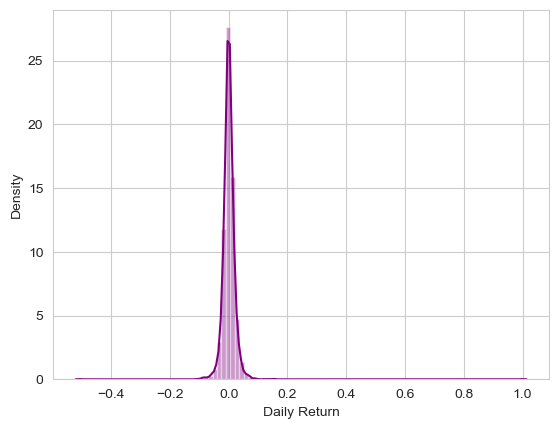

In [69]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(tcs_df['Daily Return'].dropna(),bins=100,color='purple')

Now we can use quantile to get the risk value for the stock.

In [70]:
# The 0.05 empirical quantile of daily returns
# For APPL stocks
rets["TCS"].quantile(0.05)

-0.026051501296664087

The 0.05 empirical quantile of daily returns is at -0.026051501296664087. That means that with 95% confidence, our worst daily loss will not exceed 2.6%. If we have a 10,00,000 investment, our one-day 5% VaR is 0.026 * 10,00,000 = 26,000.

In [71]:
# For AMZN stocks
rets["HCLTECH"].quantile(0.05)

-0.031191996751880974

In [72]:
# For GOOGL stocks
rets["TECHM"].quantile(0.05)

-0.03367046133887977

In [73]:
# For MSFT stocks
rets["WIPRO"].quantile(0.05)

-0.028581939362994524

#### Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.


Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

In [74]:
rets.head()

,TCS,HCLTECH,WIPRO,TECHM
Date,,,,
2007-04-03,0.011310,0.021284,0.029879,0.001380
2007-04-04,-0.003534,0.035214,0.028264,0.021633
2007-04-05,-0.003505,0.002430,0.005916,0.002989
2007-04-09,0.019260,0.017486,0.014839,0.028270
2007-04-10,-0.016308,-0.014123,-0.023360,-0.011238


In [76]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for GOOGL
mu = rets.mean()['TECHM']

# Now let's grab the volatility of the stock from the std() of the average return for GOOGL
sigma = rets.std()['TECHM']

Next, we will create a function that takes in the starting price and number of days, and uses the sigma and mu we already calculated form our daily returns.

In [77]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Awesome! Now lets put above function to work.

In [80]:
techm_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-04-02,350.000000,350.500000,332.250000,335.250000,255.498123,1219916.0
2007-04-03,338.750000,340.500000,332.762512,335.712494,255.850525,1188476.0
2007-04-04,341.000000,346.250000,338.750000,342.975006,261.385437,1374500.0
2007-04-05,345.049988,348.750000,338.799988,344.000000,262.166626,680484.0
2007-04-09,346.250000,357.174988,346.250000,353.725006,269.578156,1424248.0


Text(0.5, 1.0, 'Monte Carlo Analysis for tech mahindra')

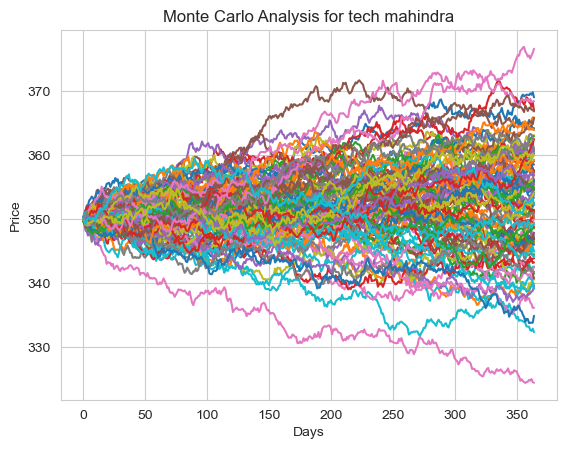

In [82]:
start_price = 350

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for tech mahindra')

In [87]:
# For Amazon Stock - AMZN
tcs_df.drop(['MA for 100 days'], axis=1, inplace=True)
tcs_df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2005-04-01,179.125,182.125000,176.750000,181.369995,129.156830,5562672.0,NaN
2005-04-04,181.500,182.100006,177.912506,178.470001,127.091652,5257360.0,-0.015989
2005-04-05,178.625,180.312500,177.012497,178.182495,126.886925,3367832.0,-0.001611
2005-04-06,178.375,181.000000,178.375000,180.169998,128.302231,1953408.0,0.011154
2005-04-07,180.125,181.250000,177.750000,178.149994,126.863838,2483216.0,-0.011212


Text(0.5, 1.0, 'Monte Carlo Analysis for TCS')

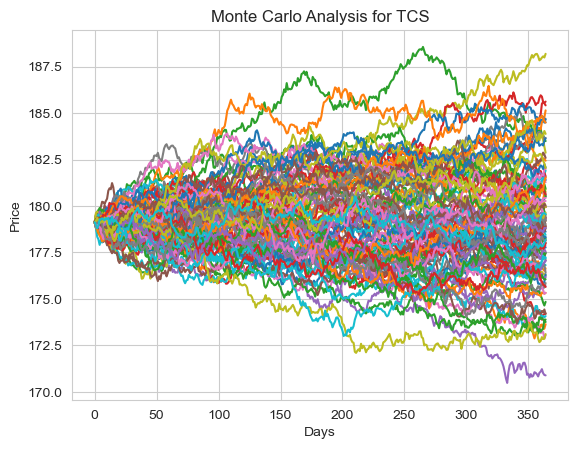

In [100]:
start_price =179.125
mu = rets.mean()['TCS']

# Now let's grab the volatility of the stock from the std() of the average return for GOOGL
sigma = rets.std()['TCS']

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for TCS')

In [89]:
# For Apple Stock - AAPL
hcltech_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-04-01,46.375000,48.307499,45.8950,47.945000,30.386135,6029520.0
2005-04-04,48.000000,48.000000,46.2500,47.200001,29.913988,6634040.0
2005-04-05,46.907501,48.125000,46.7500,47.845001,30.322763,6411736.0
2005-04-06,47.750000,48.250000,47.0200,47.494999,30.100933,4561024.0
2005-04-07,47.849998,49.095001,46.9375,47.232498,29.934568,8110752.0


Text(0.5, 1.0, 'Monte Carlo Analysis for HCLTECH')

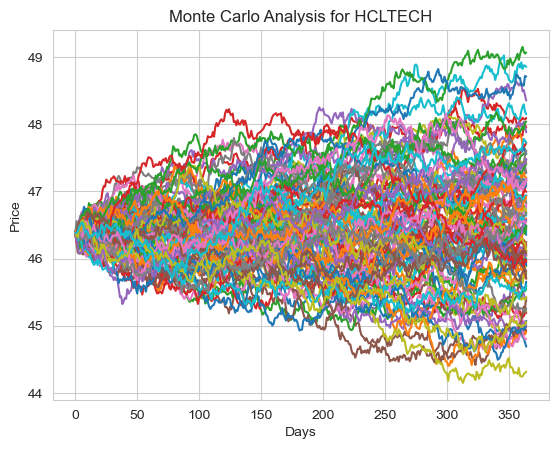

In [101]:
start_price = 46.375

mu = rets.mean()['HCLTECH']

# Now let's grab the volatility of the stock from the std() of the average return for GOOGL
sigma = rets.std()['HCLTECH']


for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for HCLTECH')

In [91]:
# For Microsoft Stock - MSFT
wipro_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-05-02,71.887505,72.495003,71.077499,71.775002,59.630405,2505457.0
2005-05-03,72.281250,72.281250,70.312500,70.576881,58.635002,3684666.0
2005-05-04,70.813126,71.431877,70.650002,70.981880,58.971489,2676728.0
2005-05-05,72.225006,72.450005,71.325005,71.707504,59.574333,2918533.0
2005-05-06,61.200005,72.000000,61.200005,71.566879,59.457497,2933190.0


Text(0.5, 1.0, 'Monte Carlo Analysis for WIPRO')

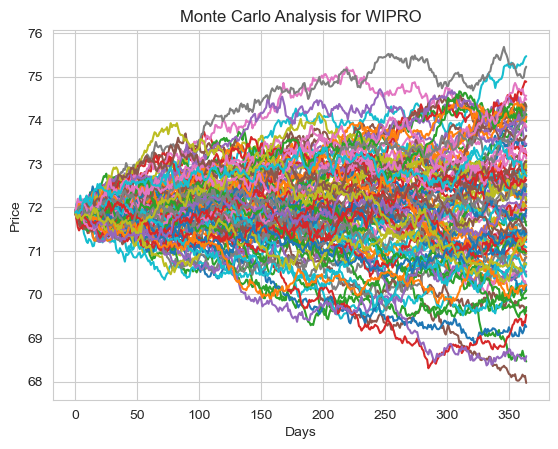

In [103]:
start_price = 71.88
mu = rets.mean()['WIPRO']

# Now let's grab the volatility of the stock from the std() of the average return for GOOGL
sigma = rets.std()['WIPRO']

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for WIPRO')

Let's go ahead and get a histogram of the end results for a much larger run. (note: This could take a little while to run , depending on the number of runs chosen)

In [110]:
tcs_df.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2024-04-22,3837.000000,3878.000000,3812.000000,3864.600098,3864.600098,1728883.0,0.010036
2024-04-23,3877.050049,3895.000000,3860.600098,3874.699951,3874.699951,1807586.0,0.002613
2024-04-24,3890.000000,3898.000000,3824.449951,3831.050049,3831.050049,1317312.0,-0.011265
2024-04-25,3811.199951,3873.649902,3811.000000,3852.199951,3852.199951,2856271.0,0.005521
2024-04-26,3855.149902,3876.800049,3850.000000,3850.000000,3850.000000,617553.0,-0.000571


In [111]:
start_price = 3837

# Set a large numebr of runs
runs = 10000
mu = rets.mean()['TCS']

# Now let's grab the volatility of the stock from the std() of the average return for GOOGL
sigma = rets.std()['TCS']

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for TCS after 365 days')

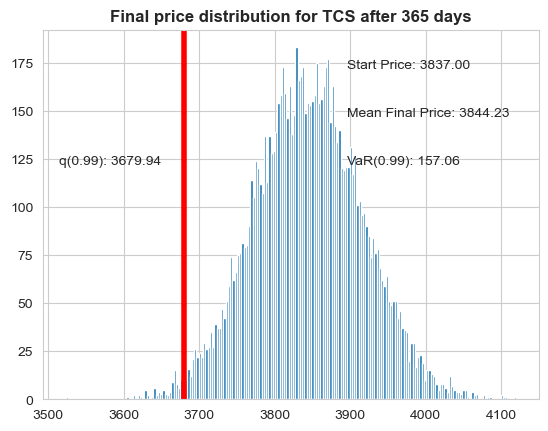

In [112]:

# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: %.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: %.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): %.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): %.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(label="Final price distribution for TCS after %s days" % days, weight='bold')


# Stock price prediction 

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf 
from statsmodels.tsa.arima_model import ARIMA     
from sklearn.metrics import mean_squared_error           
from sklearn.model_selection import train_test_split

In [114]:
!pip install pmdarima

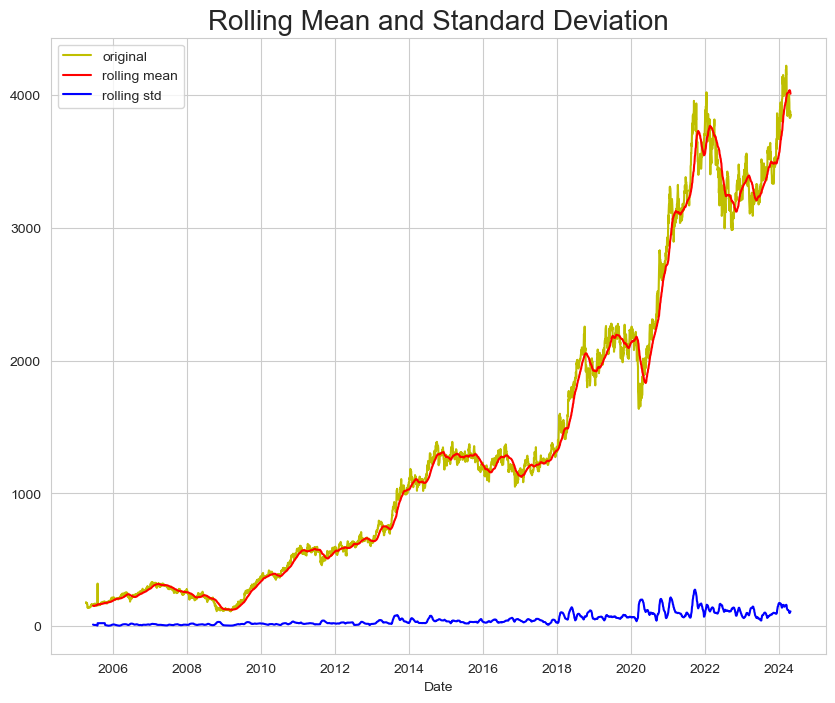

Weak evidence against null hypothesis, time series is non-stationary 


In [116]:
#Stationarity test
from statsmodels.tsa.stattools import adfuller

def test_stationarity(column):
    rolmean = column.rolling(50).mean()
    rolstd = column.rolling(50).std()
    plt.figure(figsize = (10,8))
    plt.plot(column, color = 'y', label = 'original')
    plt.plot(rolmean, color = 'r', label = 'rolling mean')
    plt.plot(rolstd, color = 'b', label = 'rolling std')
    plt.xlabel('Date')
    plt.legend()
    plt.title('Rolling Mean and Standard Deviation',  fontsize = 20)
    plt.show(block = False)
    result = adfuller(column)

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("Weak evidence against null hypothesis, time series is non-stationary ")

        
tcs_df.dropna(inplace=True)        
test_stationarity(tcs_df['Close'])

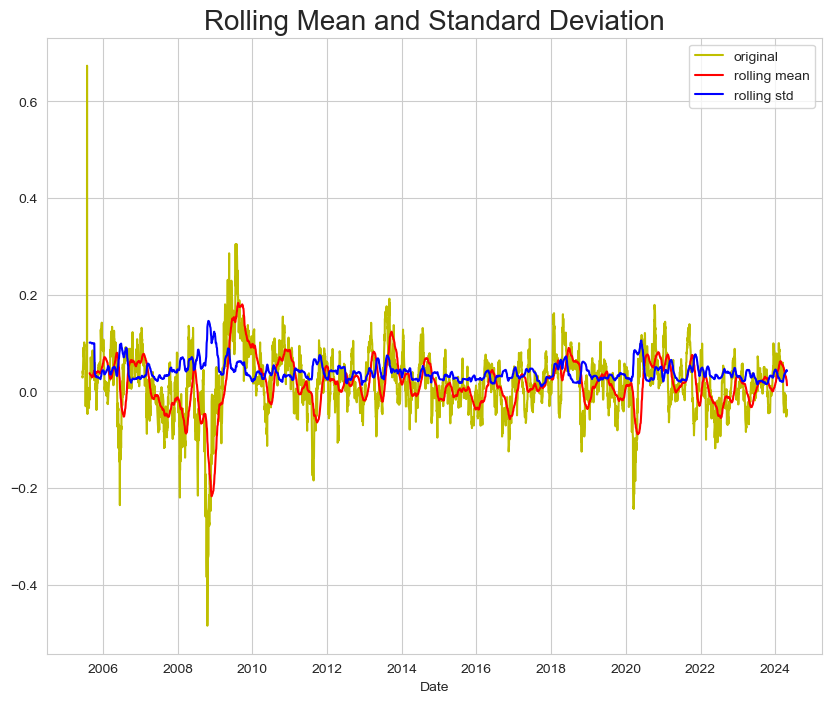

Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [117]:
df_price_log= np.log(tcs_df['Close'])
mav = df_price_log.rolling(50).mean()
df_price_log.dropna(inplace = True)
df_price_log_diff = df_price_log - mav
df_price_log_diff.dropna(inplace = True)
test_stationarity(df_price_log_diff)

In [118]:
index=int(0.8*(df_price_log_diff.shape[0]))
train = df_price_log_diff[:index]
test = df_price_log_diff[index:]

In [119]:
from pmdarima import auto_arima
model = auto_arima(train, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-17080.865, Time=2.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-9325.972, Time=0.60 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-16949.127, Time=0.35 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-12555.147, Time=1.45 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-9100.549, Time=0.32 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-17085.228, Time=0.95 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-14165.848, Time=2.45 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-17075.837, Time=0.93 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-17086.124, Time=2.25 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-15061.928, Time=4.17 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-17084.028, Time=4.83 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-17084.176, Time=2.76 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-15566.316, Time=6.75 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-17082.141, Time=7.32 sec
 ARIMA(

ARIMA(order=(1, 0, 3), scoring_args={}, suppress_warnings=True)

In [146]:
predictions = model.predict(n_periods = len(test))
print(predictions)


3724    0.043427
3725    0.043641
3726    0.043102
3727    0.042231
3728    0.041390
          ...   
4650    0.017636
4651    0.017636
4652    0.017636
4653    0.017636
4654    0.017636
Length: 931, dtype: float64


C:\Users\Bhavya shah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [151]:
# df=pd.read_csv("C:\\Users\\Bhavya shah\\Downloads\\TATAMOTORS.NS.csv")
df=tcs_df
df1=df1
df.dropna(inplace=True)
df=df.drop(['Adj Close','Volume','Daily Return'],axis=1)
df.head()

,Open,High,Low,Close
Date,,,,
2005-04-04,181.500000,182.100006,177.912506,178.470001
2005-04-05,178.625000,180.312500,177.012497,178.182495
2005-04-06,178.375000,181.000000,178.375000,180.169998
2005-04-07,180.125000,181.250000,177.750000,178.149994
2005-04-08,178.837494,179.362503,173.757507,174.195007


Text(0.5, 1.0, 'Closing price of TCS')

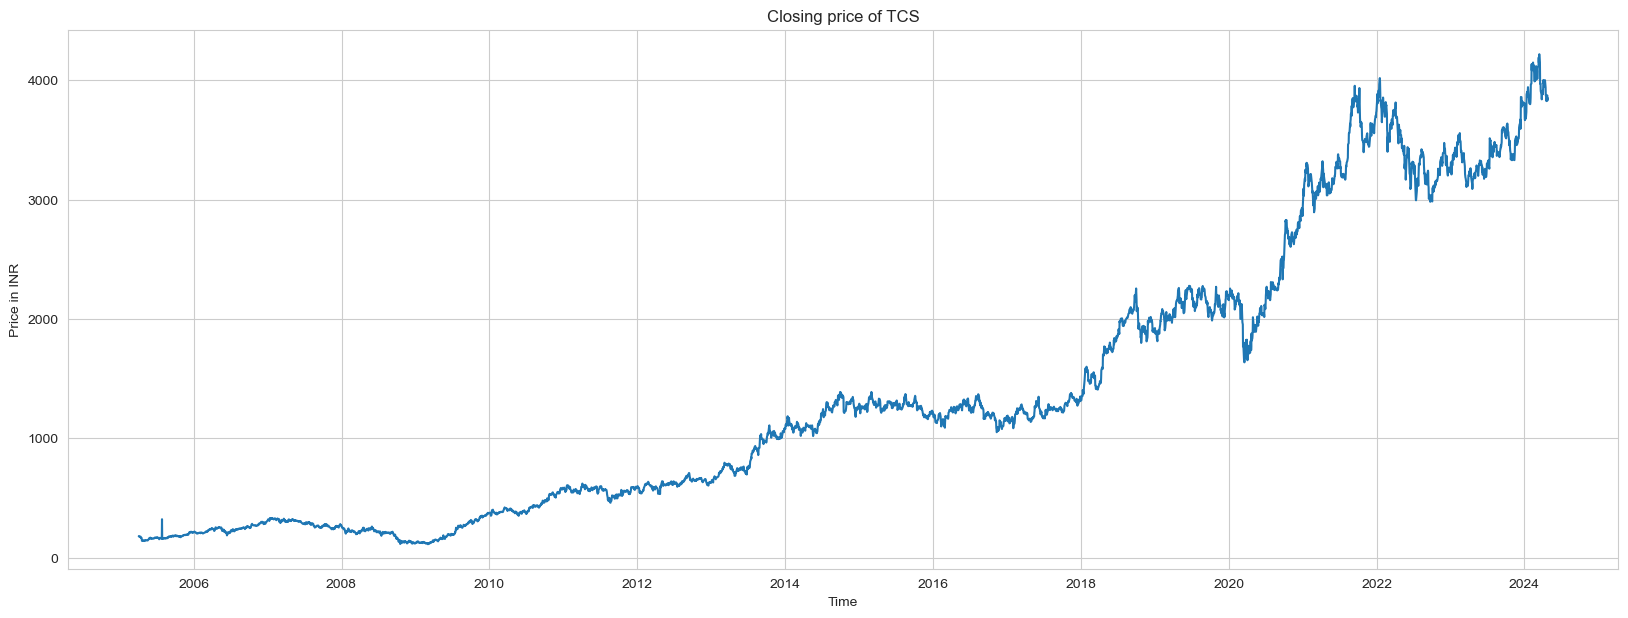

In [153]:

plt.figure(figsize=(20,7))
plt.plot(df['Close'])
plt.ylabel("Price in INR")
plt.xlabel("Time")
plt.title("Closing price of TCS")

In [157]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import keras
import math
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,LSTM
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

data=df.values
train_len=math.ceil(len(data)*0.80)
scaler1 = MinMaxScaler(feature_range=(0,1))
df['Close'] = scaler1.fit_transform(df[['Close']])
scaler = MinMaxScaler(feature_range=(0,1))
for column in df.columns:
    if column!='Close':
        df[column] = scaler.fit_transform(df[[column]])

scaled_data=df.values
scaled_data.shape

train_data=scaled_data[0:train_len,:]
train_data

array([[0.01693779, 0.01594426, 0.01818612, 0.01629135],
       [0.01623713, 0.01551235, 0.01796515, 0.01622136],
       [0.0161762 , 0.01567847, 0.01829966, 0.01670521],
       ...,
       [0.52592457, 0.52149709, 0.51649366, 0.5130243 ],
       [0.51593249, 0.51427251, 0.51243046, 0.50948222],
       [0.5101444 , 0.51556523, 0.50873553, 0.51386423]])

In [159]:
interval=60
x_train=[]
y_train=[]
for i in range(interval,len(train_data)):
    x_train.append(train_data[i-interval:i,0])
    y_train.append(train_data[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(3704, 60, 1)

In [161]:
model=Sequential()
model.add(LSTM(64,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(10,return_sequences=False))
model.add(Dropout(0.25))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mean_squared_error")
history=model.fit(x_train,y_train,batch_size=64,epochs=10)

Epoch 1/10
58/58 [==============================] - 10s 57ms/step - loss: 0.0060
Epoch 2/10
58/58 [==============================] - 3s 56ms/step - loss: 0.0022
Epoch 3/10
58/58 [==============================] - 3s 55ms/step - loss: 0.0017
Epoch 4/10
58/58 [==============================] - 3s 57ms/step - loss: 0.0016
Epoch 5/10
58/58 [==============================] - 3s 55ms/step - loss: 0.0015
Epoch 6/10
58/58 [==============================] - 3s 57ms/step - loss: 0.0014
Epoch 7/10
58/58 [==============================] - 3s 55ms/step - loss: 0.0012
Epoch 8/10
58/58 [==============================] - 3s 57ms/step - loss: 0.0013
Epoch 9/10
58/58 [==============================] - 3s 55ms/step - loss: 0.0012
Epoch 10/10
58/58 [==============================] - 3s 59ms/step - loss: 0.0011


In [162]:
summary=model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 64)            16896     
                                                                 
 lstm_3 (LSTM)               (None, 10)                3000      
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 19,907
Trainable params: 19,907
Non-trainable params: 0
_________________________________________________________________


In [163]:
test_data=scaled_data[train_len-interval:,:]

x_test=[]
y_test=data[train_len:,:]
for i in range(interval,len(test_data)):
    x_test.append(test_data[i-interval:i,0])

x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [164]:
predictions=model.predict(x_test)
print(predictions)
predictions=min_max_scalar.inverse_transform(predictions)
predictions[0:5]

30/30 [==============================] - 2s 22ms/step
[[0.47902822]
 [0.48209065]
 [0.48462626]
 [0.48643214]
 [0.48823553]
 [0.48985532]
 [0.49092585]
 [0.49187043]
 [0.4926809 ]
 [0.49297068]
 [0.49255002]
 [0.4917762 ]
 [0.49127814]
 [0.49173078]
 [0.49273658]
 [0.4942654 ]
 [0.49596128]
 [0.49740452]
 [0.49862045]
 [0.49976617]
 [0.5011247 ]
 [0.50264955]
 [0.50387186]
 [0.5048981 ]
 [0.5055851 ]
 [0.50605017]
 [0.5061989 ]
 [0.5061261 ]
 [0.5060361 ]
 [0.50574267]
 [0.5053631 ]
 [0.5048489 ]
 [0.50421655]
 [0.503506  ]
 [0.50301254]
 [0.50270605]
 [0.50226665]
 [0.5020565 ]
 [0.5017845 ]
 [0.50170106]
 [0.5018104 ]
 [0.5021837 ]
 [0.50317883]
 [0.5044302 ]
 [0.50590795]
 [0.5074291 ]
 [0.50943327]
 [0.51270664]
 [0.5166304 ]
 [0.5207384 ]
 [0.52483326]
 [0.5285209 ]
 [0.53195333]
 [0.53527504]
 [0.537753  ]
 [0.53875345]
 [0.53943425]
 [0.5397649 ]
 [0.54037446]
 [0.5413281 ]
 [0.54355145]
 [0.54763365]
 [0.55280817]
 [0.55906236]
 [0.5658227 ]
 [0.57264465]
 [0.5794512 ]
 [0.5858

NameError: name 'min_max_scalar' is not defined

C:\Users\Bhavya shah\AppData\Local\Temp\ipykernel_16412\3315501673.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['predictions']=predictions


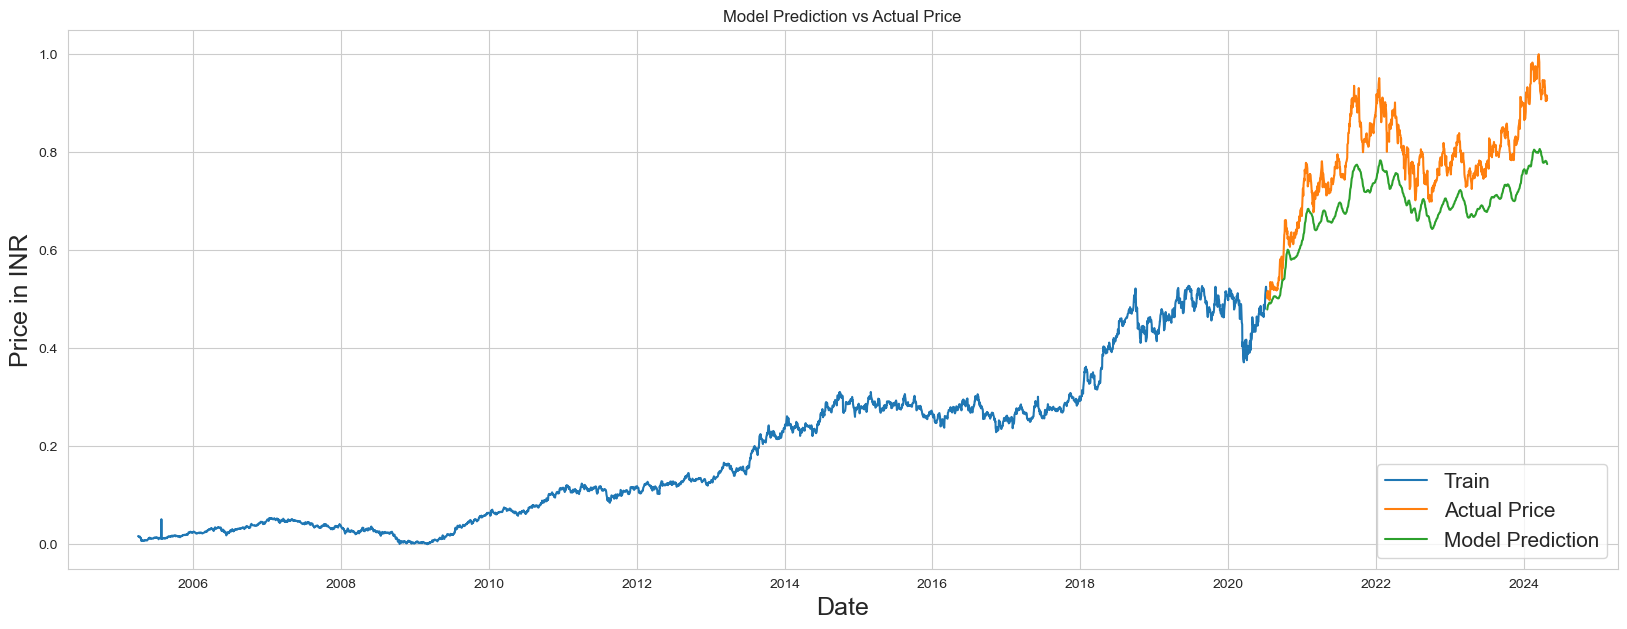

In [165]:
train_data=df[0:train_len]
valid_data=df[train_len:]
valid_data['predictions']=predictions
valid_data.head()
plt.figure(figsize=(20,7))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR",fontsize=18)
plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])
plt.plot(valid_data['predictions'])
plt.legend(['Train','Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()

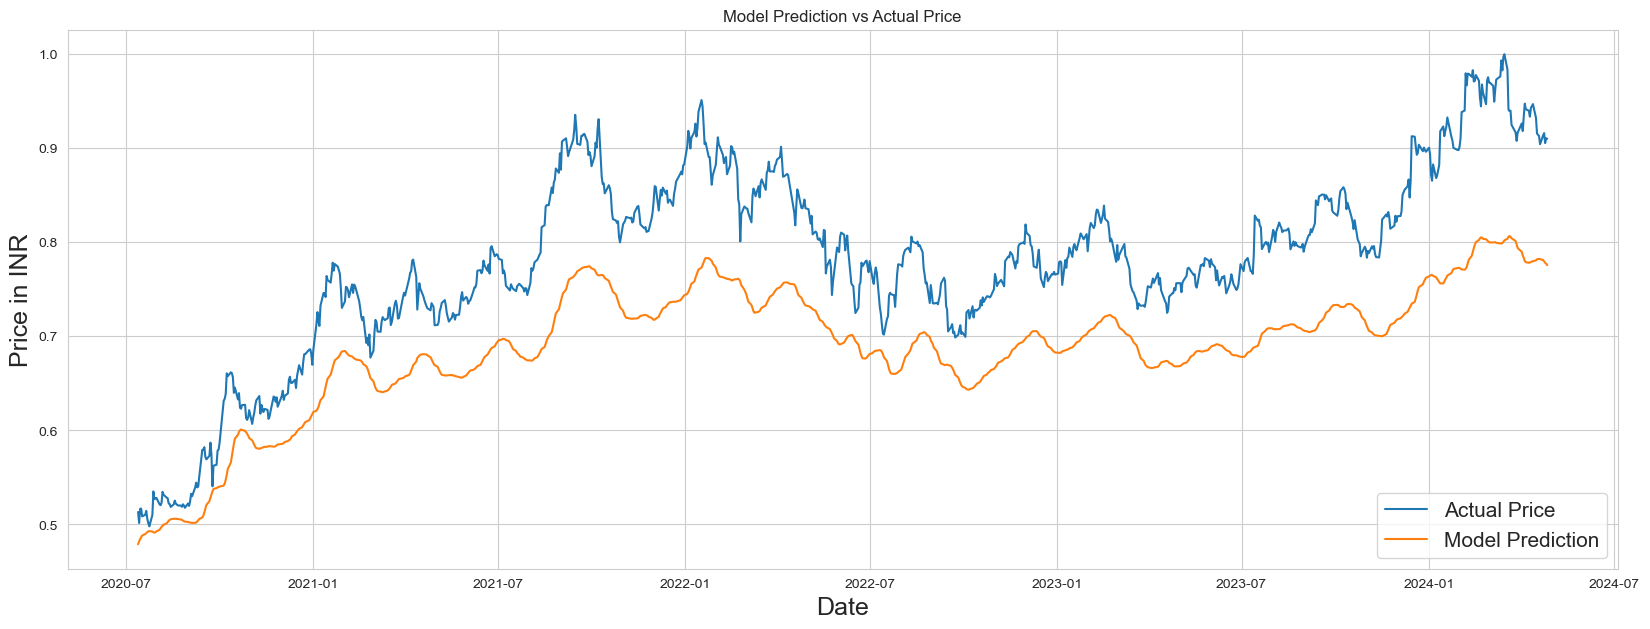

In [166]:
plt.figure(figsize=(20,7))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR",fontsize=18)
# plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])
plt.plot(valid_data['predictions'])
plt.legend(['Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()